# Vehicle Resale Value Prediction

## Importing the Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns


from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

## Importing the Dataset

In [2]:
dataset=pd.read_csv(r'data.csv',encoding='cp1252',low_memory=False)
dataset

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,24-03-2016 00:00,0.0,70435.0,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,yes,24-03-2016 00:00,0.0,66954.0,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480.0,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,no,17-03-2016 00:00,0.0,91074.0,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,no,31-03-2016 00:00,0.0,60437.0,06-04-2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371534,14-03-2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000,1.0,NaN,sonstige_autos,NaN,14-03-2016 00:00,0.0,39576.0,06-04-2016 00:46
371535,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatic,101.0,fortwo,125000,3.0,benzin,smart,no,05-03-2016 00:00,0.0,26135.0,11-03-2016 18:17
371536,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000,3.0,diesel,volkswagen,no,19-03-2016 00:00,0.0,87439.0,07-04-2016 07:15
371537,20-03-2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000,6.0,diesel,volkswagen,NaN,20-03-2016 00:00,0.0,40764.0,24-03-2016 12:45


In [3]:
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,24-03-2016 00:00,0.0,70435.0,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,yes,24-03-2016 00:00,0.0,66954.0,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatic,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480.0,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,no,17-03-2016 00:00,0.0,91074.0,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,no,31-03-2016 00:00,0.0,60437.0,06-04-2016 10:17


In [4]:
dataset.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.715380e+05,371537.000000,371538.000000,371537.000000,371537.0,371537.000000
mean,1.729544e+04,2004.577883,115.548840,5.734473,0.0,50820.666402
std,3.587905e+06,92.865496,192.137238,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,12.000000,0.0,99998.000000


In [5]:
dataset.corr()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,0.006850,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000182,1.000000,0.000351,-0.011607,NaN,-0.001653
powerPS,0.006850,0.000351,1.000000,0.044359,NaN,0.027114
monthOfRegistration,-0.002826,-0.011607,0.044359,1.000000,NaN,0.014962
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001653,0.027114,0.014962,NaN,1.000000


In [6]:
dataset.isnull().any()

dateCrawled            False
name                   False
seller                  True
offerType               True
price                   True
abtest                  True
vehicleType             True
yearOfRegistration      True
gearbox                 True
powerPS                 True
model                   True
kilometer               True
monthOfRegistration     True
fuelType                True
brand                   True
notRepairedDamage       True
dateCreated             True
nrOfPictures            True
postalCode              True
lastSeen                True
dtype: bool

In [7]:
dataset.isnull().sum()

dateCrawled                0
name                       0
seller                     1
offerType                  1
price                      1
abtest                     1
vehicleType            37870
yearOfRegistration         2
gearbox                20210
powerPS                    1
model                  20485
kilometer                  1
monthOfRegistration        2
fuelType               33388
brand                      2
notRepairedDamage      72062
dateCreated                2
nrOfPictures               2
postalCode                 2
lastSeen                   2
dtype: int64

## Taking Care Of Missing Data

In [8]:
#dropping unwanted columns
print(dataset.seller.unique())
print(dataset.offerType.unique())
print(dataset.abtest.unique())
print(dataset.nrOfPictures.unique())

['privat' 'gewerblich' nan 'golf']
['Angebot' 'Gesuch' nan '150000']
['test' 'control' nan 'benzin']
[ 0. nan]


In [9]:
dataset.drop(['name','seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated','model'], axis='columns', inplace=True)

In [10]:
dataset

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480.0,NaN,1993.0,manuell,0.0,150000,0.0,benzin,volkswagen,NaN
1,18300.0,coupe,2011.0,manuell,190.0,125000,5.0,diesel,audi,yes
2,9800.0,suv,2004.0,automatic,163.0,125000,8.0,diesel,jeep,NaN
3,1500.0,kleinwagen,2001.0,manuell,75.0,150000,6.0,benzin,volkswagen,no
4,3600.0,kleinwagen,2008.0,manuell,69.0,90000,7.0,diesel,skoda,no
...,...,...,...,...,...,...,...,...,...,...
371534,2200.0,NaN,2005.0,NaN,0.0,20000,1.0,NaN,sonstige_autos,NaN
371535,1199.0,cabrio,2000.0,automatic,101.0,125000,3.0,benzin,smart,no
371536,9200.0,bus,1996.0,manuell,102.0,150000,3.0,diesel,volkswagen,no
371537,3400.0,kombi,2002.0,manuell,100.0,150000,6.0,diesel,volkswagen,NaN


In [11]:
dataset.isnull().sum()

price                      1
vehicleType            37870
yearOfRegistration         2
gearbox                20210
powerPS                    1
kilometer                  1
monthOfRegistration        2
fuelType               33388
brand                      2
notRepairedDamage      72062
dtype: int64

In [12]:
dataset=dataset.dropna()

In [13]:
dataset

,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300.0,coupe,2011.0,manuell,190.0,125000,5.0,diesel,audi,yes
3,1500.0,kleinwagen,2001.0,manuell,75.0,150000,6.0,benzin,volkswagen,no
4,3600.0,kleinwagen,2008.0,manuell,69.0,90000,7.0,diesel,skoda,no
5,650.0,limousine,1995.0,manuell,102.0,150000,10.0,benzin,bmw,yes
6,2200.0,cabrio,2004.0,manuell,109.0,150000,8.0,benzin,peugeot,no
...,...,...,...,...,...,...,...,...,...,...
371531,3200.0,limousine,2004.0,manuell,225.0,150000,5.0,benzin,seat,yes
371532,1150.0,bus,2000.0,manuell,0.0,150000,3.0,benzin,opel,no
371535,1199.0,cabrio,2000.0,automatic,101.0,125000,3.0,benzin,smart,no
371536,9200.0,bus,1996.0,manuell,102.0,150000,3.0,diesel,volkswagen,no


In [14]:
dataset.isnull().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [15]:
dataset.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration
count,2.680210e+05,268021.000000,268021.000000,268021.000000
mean,1.670942e+04,2003.183273,126.633215,6.165916
std,4.166472e+06,6.710726,155.755707,3.478328
min,0.000000e+00,1910.000000,0.000000,0.000000
25%,1.500000e+03,1999.000000,77.000000,3.000000
50%,3.800000e+03,2004.000000,116.000000,6.000000
75%,8.600000e+03,2008.000000,150.000000,9.000000
max,2.147484e+09,2018.000000,20000.000000,12.000000


In [16]:
dataset['vehicleType'].value_counts()

limousine     78162
kleinwagen    60709
kombi         54451
bus           25502
cabrio        19204
coupe         15335
suv           12676
andere         1982
Name: vehicleType, dtype: int64

In [17]:
dataset['gearbox'].value_counts()

manuell      205182
automatic     62839
Name: gearbox, dtype: int64

In [18]:
dataset['fuelType'].value_counts()

benzin     174482
diesel      88463
lpg          4184
cng           470
hybrid        243
andere         99
elektro        80
Name: fuelType, dtype: int64

In [19]:
dataset['brand'].value_counts()

volkswagen        55213
bmw               30879
mercedes_benz     27268
opel              26959
audi              25122
ford              17778
renault           11924
peugeot            8125
fiat               6511
seat               5096
skoda              4589
mazda              4153
toyota             3758
citroen            3756
nissan             3654
smart              3424
mini               2898
hyundai            2860
volvo              2619
sonstige_autos     2162
mitsubishi         2125
kia                2009
honda              1997
porsche            1880
alfa_romeo         1740
suzuki             1729
chevrolet          1386
chrysler           1064
dacia               733
land_rover          639
jeep                621
subaru              561
daihatsu            530
jaguar              492
saab                426
daewoo              351
lancia              328
rover               288
trabant             225
lada                149
Name: brand, dtype: int64

In [20]:
dataset['notRepairedDamage'].value_counts()

no     238714
yes     29307
Name: notRepairedDamage, dtype: int64

In [21]:
dataset = dataset[["vehicleType","yearOfRegistration","gearbox","powerPS","kilometer","monthOfRegistration","fuelType","brand","notRepairedDamage","price"]]

In [22]:
dataset

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,coupe,2011.0,manuell,190.0,125000,5.0,diesel,audi,yes,18300.0
3,kleinwagen,2001.0,manuell,75.0,150000,6.0,benzin,volkswagen,no,1500.0
4,kleinwagen,2008.0,manuell,69.0,90000,7.0,diesel,skoda,no,3600.0
5,limousine,1995.0,manuell,102.0,150000,10.0,benzin,bmw,yes,650.0
6,cabrio,2004.0,manuell,109.0,150000,8.0,benzin,peugeot,no,2200.0
...,...,...,...,...,...,...,...,...,...,...
371531,limousine,2004.0,manuell,225.0,150000,5.0,benzin,seat,yes,3200.0
371532,bus,2000.0,manuell,0.0,150000,3.0,benzin,opel,no,1150.0
371535,cabrio,2000.0,automatic,101.0,125000,3.0,benzin,smart,no,1199.0
371536,bus,1996.0,manuell,102.0,150000,3.0,diesel,volkswagen,no,9200.0


## Data Vizualization

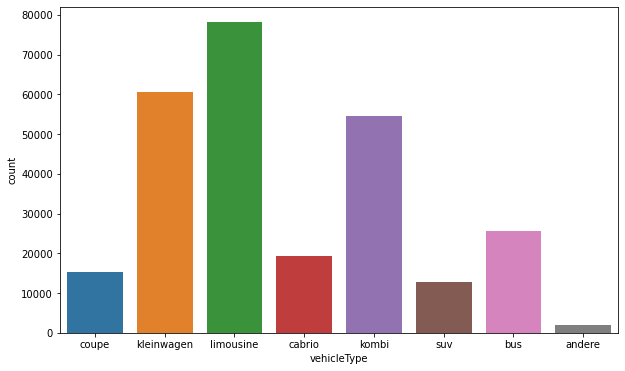

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(dataset['vehicleType']) 

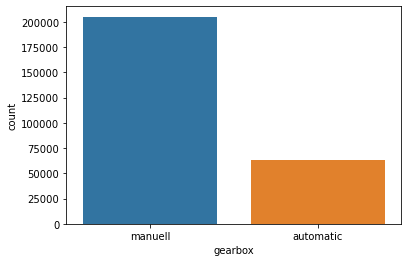

In [24]:
sns.countplot(dataset['gearbox']) 

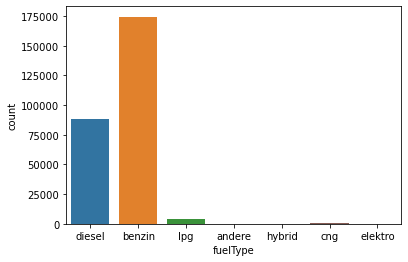

In [25]:
sns.countplot(dataset['fuelType']) 

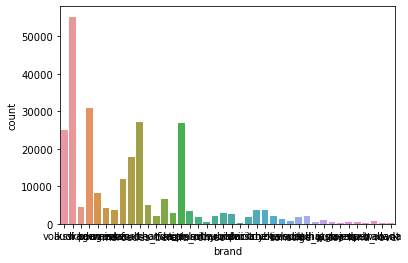

In [26]:
sns.countplot(dataset['brand']) 

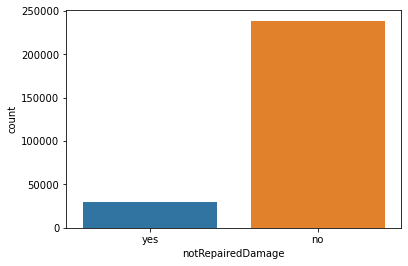

In [27]:
sns.countplot(dataset['notRepairedDamage']) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC18F8DBB0>,
      dtype=object)

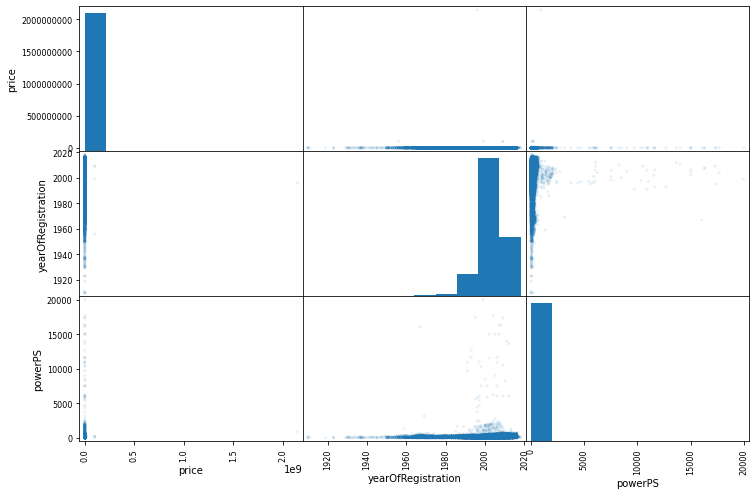

In [28]:
from pandas.plotting import scatter_matrix
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(dataset[num_attributes], figsize = (12,8), alpha = 0.1)

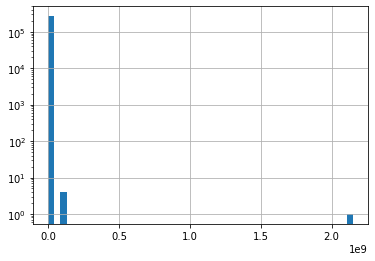

In [29]:
dataset["price"].hist(bins = 50, log = True)

In [30]:
dataset.corr()

,yearOfRegistration,powerPS,monthOfRegistration,price
yearOfRegistration,1.000000,0.090955,0.037285,-0.001952
powerPS,0.090955,1.000000,0.014213,0.010033
monthOfRegistration,0.037285,0.014213,1.000000,-0.002426
price,-0.001952,0.010033,-0.002426,1.000000


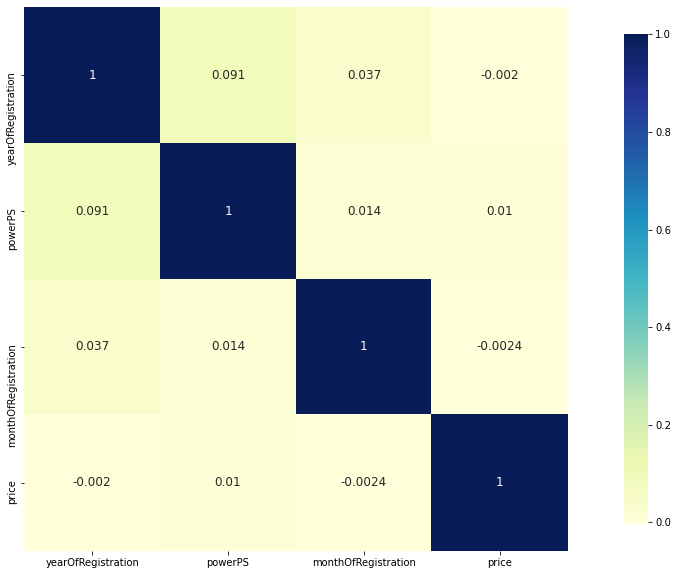

In [31]:
cat_val = ["vehicleType", "brand", "gearbox","fuelType", "notRepairedDamage"]
def plot_correlation_map( df ):
    corr = dataset.corr()
    _ , ax = plt.subplots( figsize =( 20 , 10 ) )
    #cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = "YlGnBu",
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(cat_val)

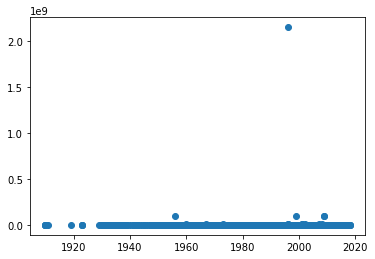

In [32]:
plt.scatter(dataset['yearOfRegistration'],dataset['price'])

## Find outliers using IQR Score(i.e. IQR=Q3-Q1)

In [33]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
dataset= dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3 + 1.5*IQR))).any(axis=1)]
dataset

,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
1,coupe,2011.0,manuell,190.0,125000,5.0,diesel,audi,yes,18300.0
3,kleinwagen,2001.0,manuell,75.0,150000,6.0,benzin,volkswagen,no,1500.0
4,kleinwagen,2008.0,manuell,69.0,90000,7.0,diesel,skoda,no,3600.0
5,limousine,1995.0,manuell,102.0,150000,10.0,benzin,bmw,yes,650.0
6,cabrio,2004.0,manuell,109.0,150000,8.0,benzin,peugeot,no,2200.0
...,...,...,...,...,...,...,...,...,...,...
371529,kombi,2005.0,manuell,3.0,150000,5.0,diesel,bmw,no,3999.0
371531,limousine,2004.0,manuell,225.0,150000,5.0,benzin,seat,yes,3200.0
371532,bus,2000.0,manuell,0.0,150000,3.0,benzin,opel,no,1150.0
371535,cabrio,2000.0,automatic,101.0,125000,3.0,benzin,smart,no,1199.0


In [34]:
dataset.corr()

,yearOfRegistration,powerPS,monthOfRegistration,price
yearOfRegistration,1.000000,0.189018,0.031381,0.677752
powerPS,0.189018,1.000000,0.048589,0.471269
monthOfRegistration,0.031381,0.048589,1.000000,0.048824
price,0.677752,0.471269,0.048824,1.000000


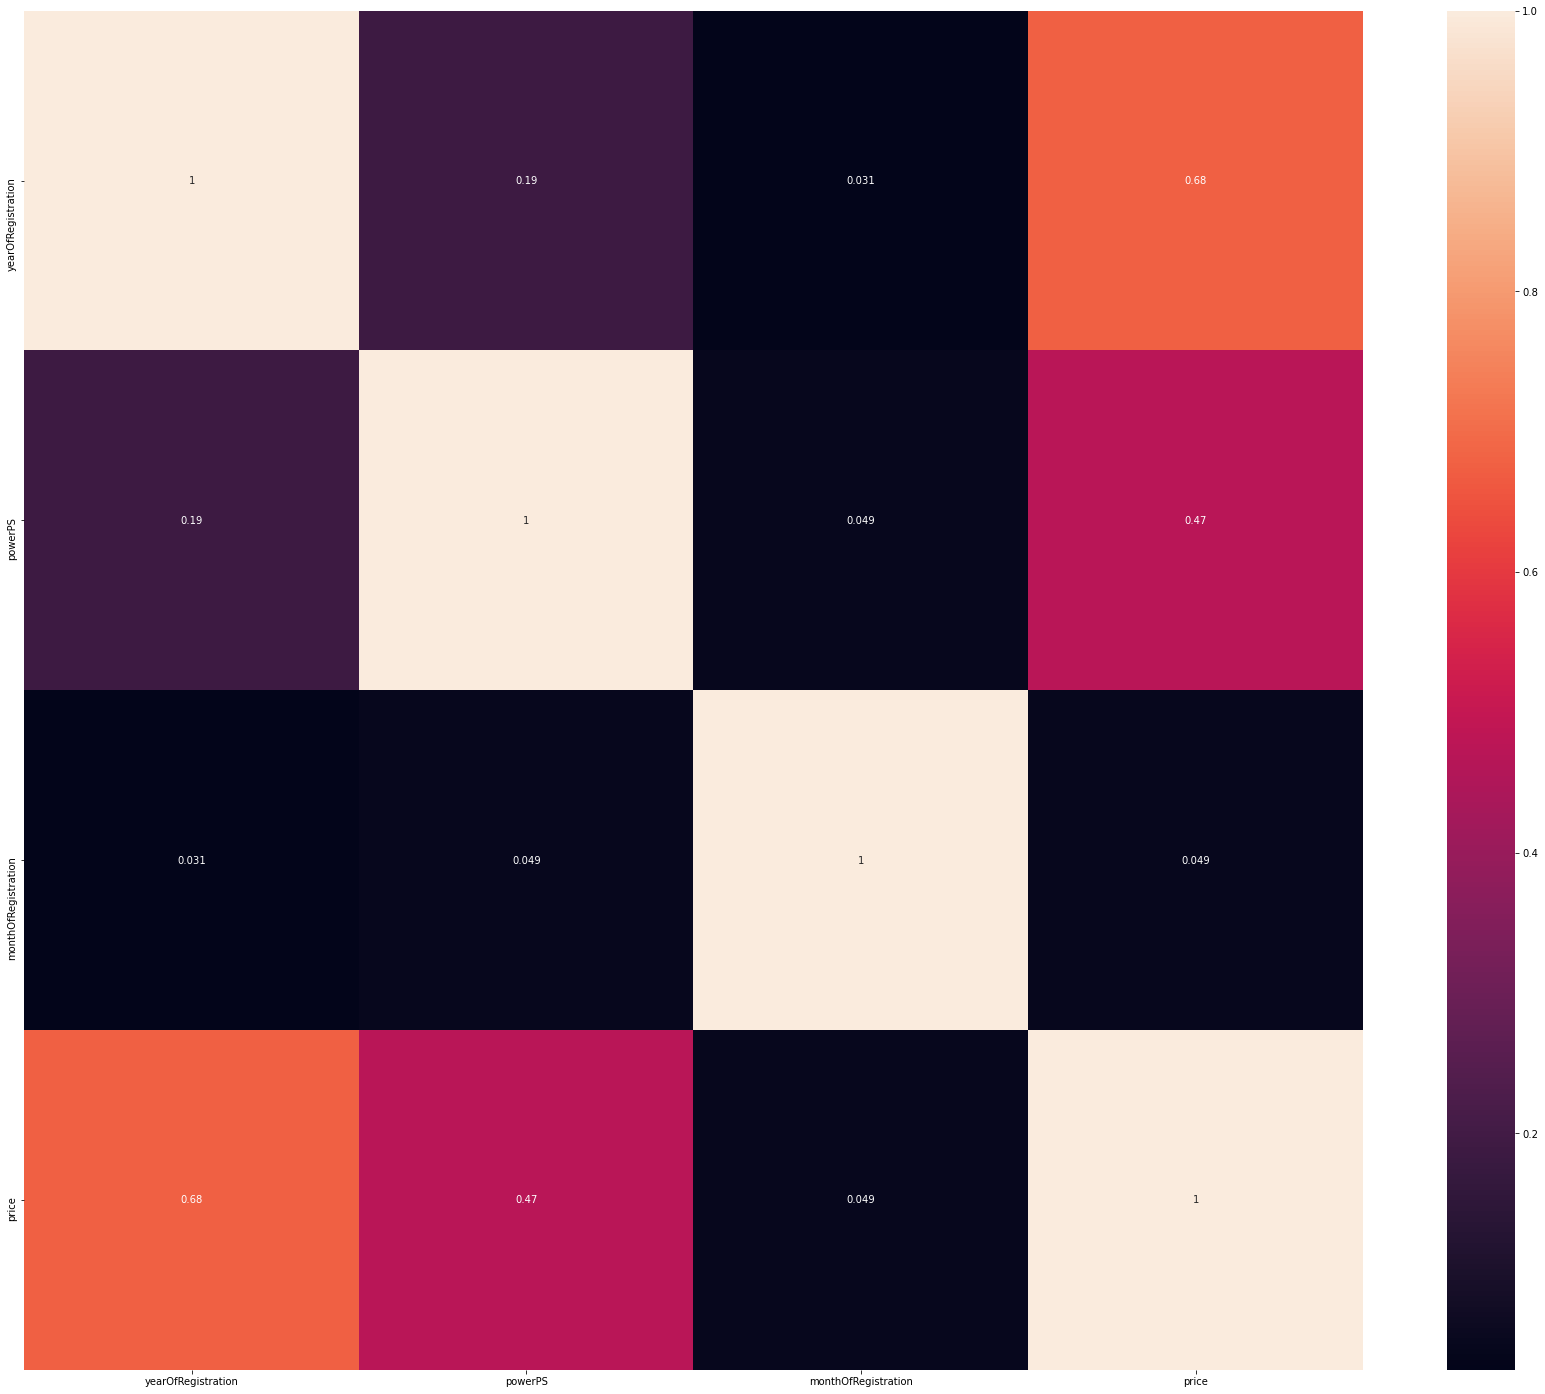

In [35]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(dataset.corr(), annot=True)

In [36]:
PRICE = dataset.corr()['price']
PRICE = abs(PRICE).sort_values()
PRICE

monthOfRegistration    0.048824
powerPS                0.471269
yearOfRegistration     0.677752
price                  1.000000
Name: price, dtype: float64

In [37]:
dataset.shape

(241760, 10)

## Export Clean Data into a CSV ready for modeling

In [39]:
export_csv=dataset.to_csv('ML_data.csv',header=True,index=True)

Text(0.5, 1.0, 'PowerPS')

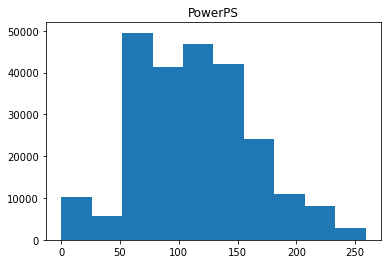

In [40]:
fig, ax = plt.subplots() 
ax.hist(dataset['powerPS']) 
ax.set_title('PowerPS') 